In [72]:
# importing packages
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
     


Palmer Penguins Modeling
Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict bill_depth_mm using the other variables in the dataset.

Dummify all variables that require this.


In [73]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict bill_depth_mm. Prepare your data and fit the following models on the entire dataset:

- Your best multiple linear regression model from before
- Two kNN models (for different values of K)
- A decision tree model


Create a plot like the right plot of Fig 1. in our Model Validation chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [74]:
X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]

#Linear Regression Model 

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), ["species", "sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

linear_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

#kNN Model with k=3

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), ["species", "sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("KNN_3", KNeighborsRegressor(n_neighbors=3))]
).set_output(transform="pandas")

KNN3_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

#kNN Model with k=10

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), ["species", "sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("KNN_10", KNeighborsRegressor(n_neighbors=10))]
).set_output(transform="pandas")

KNN10_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

#Decision Tree Model 

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), ["species", "sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("Decision_tree", DecisionTreeRegressor())]
).set_output(transform="pandas")

Dectree_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1


     

In [75]:
# Store the MSE scores in a dictionary
mse_scores = {
    "Model": ["Linear Regression", "kNN (k=3)", "kNN (k=10)", "Decision Tree"],
    "MSE": [linear_mse, KNN3_mse, KNN10_mse, Dectree_mse]
}

# Create the DataFrame
mse_df = pd.DataFrame(mse_scores)

# Display the DataFrame
print(mse_df)

     

               Model       MSE
0  Linear Regression  0.834598
1          kNN (k=3)  1.105884
2         kNN (k=10)  1.123421
3      Decision Tree  1.494632


The best model is Linear Regression. 

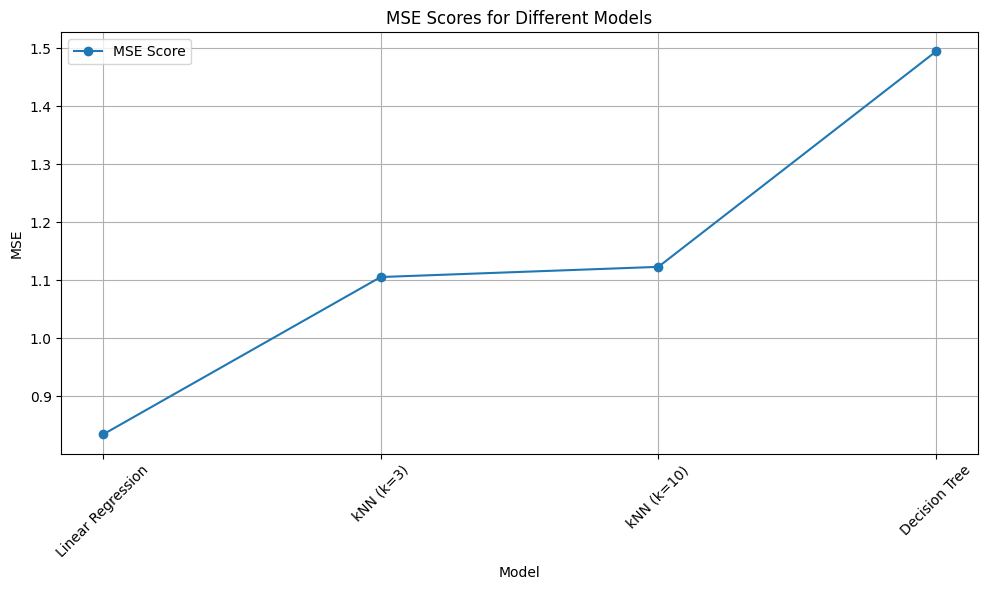

In [76]:
# Sort values for clarity (optional)
df = mse_df.sort_values(by="MSE")

# Plot the MSE scores
plt.figure(figsize=(10, 6))
plt.plot(df["Model"], df["MSE"], marker='o', label='MSE Score')

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Scores for Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.grid()  # Optional: Add grid for better readability
plt.show()